## Requirements

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load and clean dataset

In [131]:
dataset = pd.read_csv("data/cleaned_5250.csv")
missing_values_idx = dataset.isna().any(axis=1)
clean_dataset = dataset[~missing_values_idx]
clean_dataset.shape

(4765, 13)

In [132]:
num_obeservation = 4000
df = dataset.iloc[range(num_obeservation)]
df = df.drop("name", axis=1)
df.head()

,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.08,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.09,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.15,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.12,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.20,Jupiter,1.660000,2.200000,0.68,Radial Velocity


In [133]:
jupiter_mass = 1.898 * 10**27 #kg
jupiter_radius = 69911 #km
earth_mass = 5.972 * 10**24
earth_radius = 6378
df["mass_wrt"] = np.where(df["mass_wrt"] == "Jupiter", jupiter_mass, earth_mass)
df["mass"] = np.multiply(df["mass_multiplier"], df["mass_wrt"])
df["radius_wrt"] = np.where(df["radius_wrt"] == "Jupiter", jupiter_radius, earth_radius)
df["radius"] = np.multiply(df["radius_multiplier"], df["radius_wrt"])
df = df.drop(["mass_wrt", "radius_wrt", "mass_multiplier", "radius_multiplier"], axis=1)
print(df, df.shape)

      distance  stellar_magnitude   planet_type  discovery_year  \
0        304.0            4.72307     Gas Giant            2007   
1        409.0            5.01300     Gas Giant            2009   
2        246.0            5.23133     Gas Giant            2008   
3         58.0            6.61935     Gas Giant            2002   
4         69.0            6.21500     Gas Giant            1996   
...        ...                ...           ...             ...   
3995     981.0           13.96500  Neptune-like            2013   
3996     981.0           13.96500   Super Earth            2013   
3997     981.0           13.96500   Super Earth            2013   
3998    2739.0           14.00100  Neptune-like            2016   
3999    2486.0           13.56300  Neptune-like            2016   

      orbital_radius  orbital_period  eccentricity detection_method  \
0           1.290000        0.892539          0.23  Radial Velocity   
1           1.530000        1.400000          0.08  R

## Standardization

In [134]:
planet_type = df["planet_type"]
df_without_type = df.drop("planet_type", axis=1)
df_without_type["detection_method"] = df["detection_method"].astype("category").cat.codes
df_std = (df_without_type - np.mean(df_without_type, axis=0)) / np.std(df_without_type, axis=0)
print(np.std(df_std, axis=0))
df_std["planet_type"] = planet_type
df_std

distance             1.0
stellar_magnitude    1.0
discovery_year       1.0
orbital_radius       1.0
orbital_period       1.0
eccentricity         1.0
detection_method     1.0
mass                 1.0
radius               1.0
dtype: float64


,distance,stellar_magnitude,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius,planet_type
0,-0.894718,-2.467447,-1.951415,-0.033395,-0.022228,1.074501,-1.203411,1.356407,1.368047,Gas Giant
1,-0.826711,-2.375854,-1.491067,-0.031589,-0.022199,0.063556,-1.203411,1.003858,1.390008,Gas Giant
2,-0.932284,-2.306881,-1.721241,-0.036856,-0.022250,-0.475615,-1.203411,0.251856,1.521772,Gas Giant
3,-1.054050,-1.868386,-3.102286,-0.022236,-0.022007,2.018050,-1.203411,0.504451,1.455890,Gas Giant
4,-1.046925,-1.996126,-4.483330,-0.030611,-0.022154,4.107338,-1.203411,0.023380,1.631576,Gas Giant
...,...,...,...,...,...,...,...,...,...,...
3995,-0.456233,0.452208,-0.570371,-0.042198,-0.022276,-0.475615,0.472649,-0.107951,-0.613029,Neptune-like
3996,-0.456233,0.452208,-0.570371,-0.039888,-0.022259,-0.475615,0.472649,-0.102714,-0.681147,Super Earth
3997,-0.456233,0.452208,-0.570371,-0.037699,-0.022237,-0.475615,0.472649,-0.102952,-0.721217,Super Earth
3998,0.682403,0.463581,0.120151,-0.038790,-0.022253,-0.475615,0.472649,-0.108856,-0.380024,Neptune-like


## Classification problem

In [143]:
X_classification = df_std.drop("planet_type", axis=1)
y_classification = df_std["planet_type"]

assert X_classification.shape == (num_obeservation, 9)
assert y_classification.shape == (num_obeservation,)

## Histogram

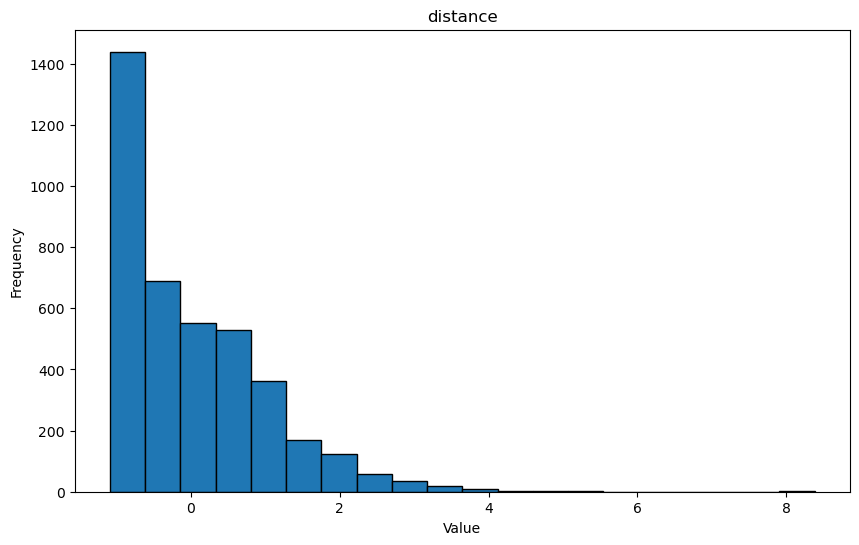

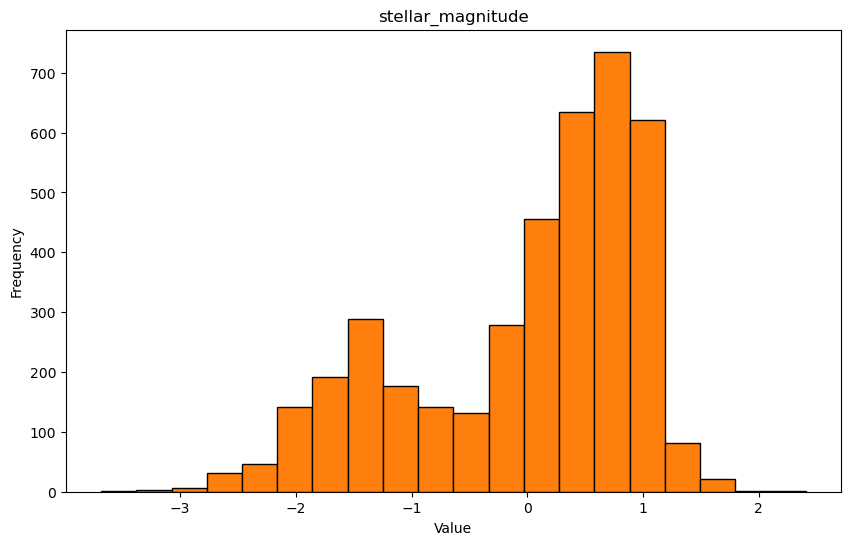

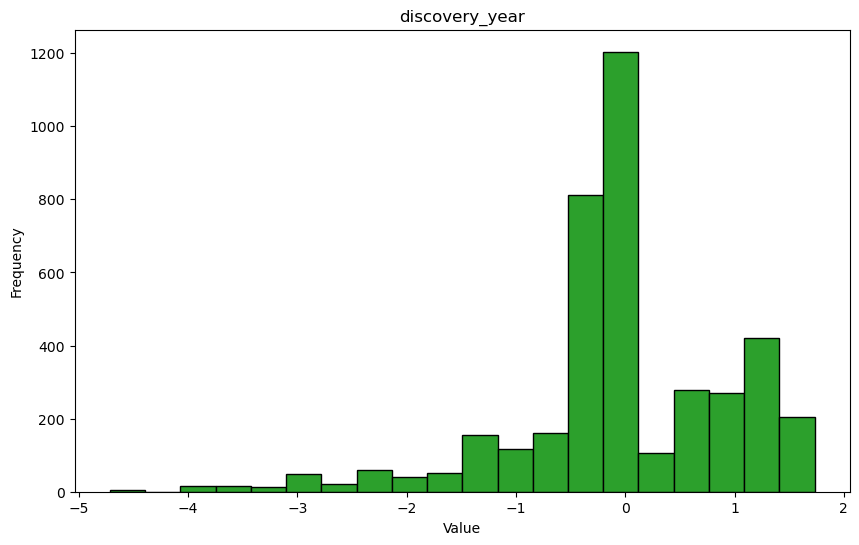

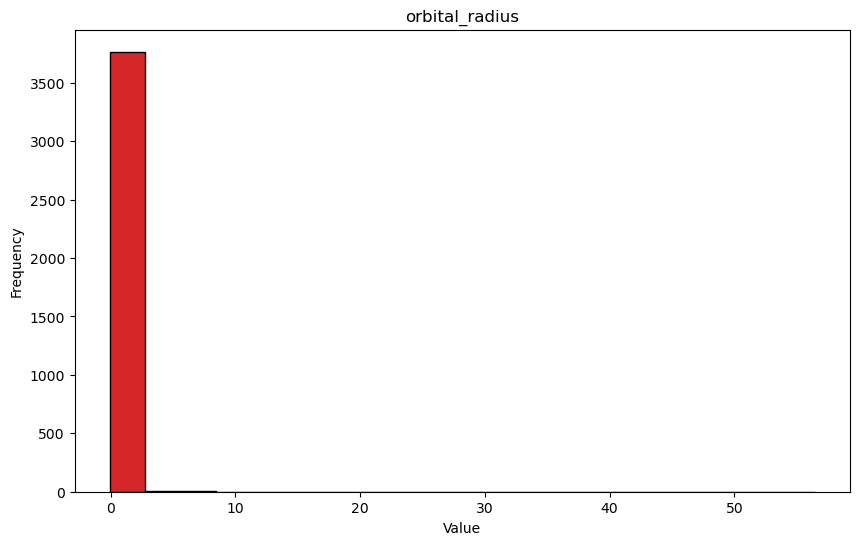

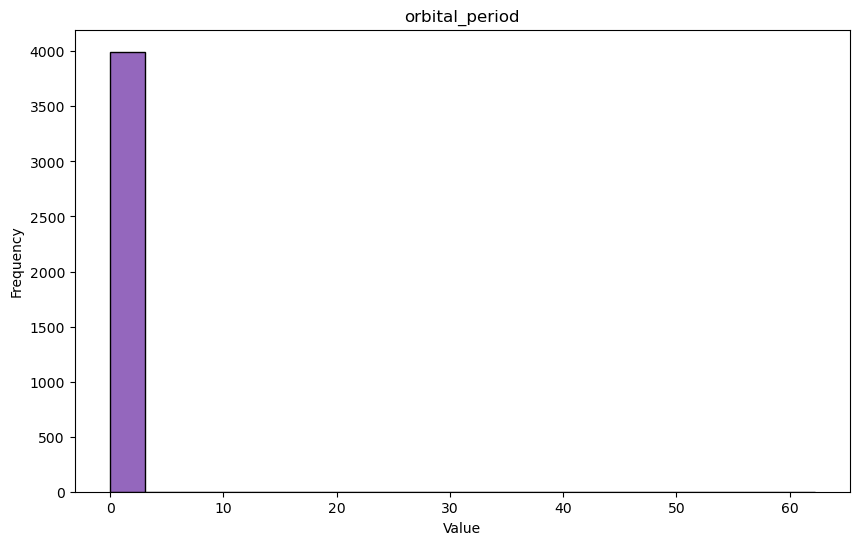

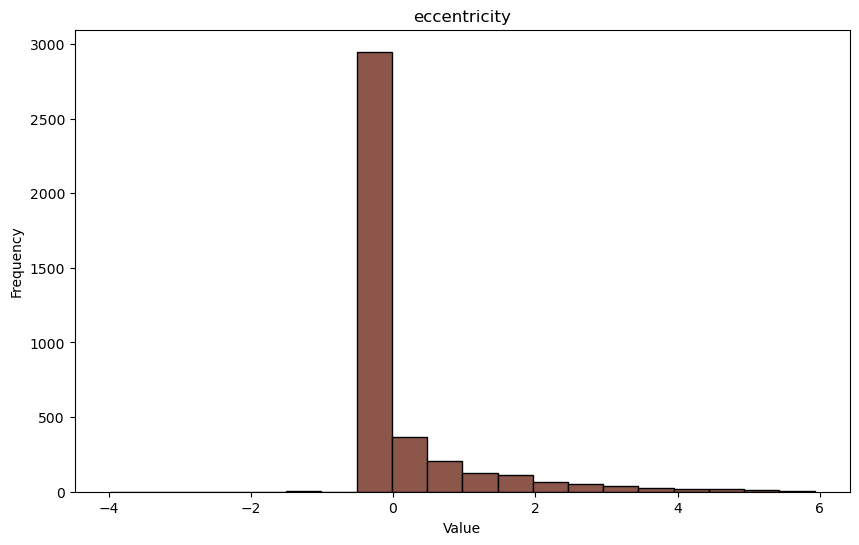

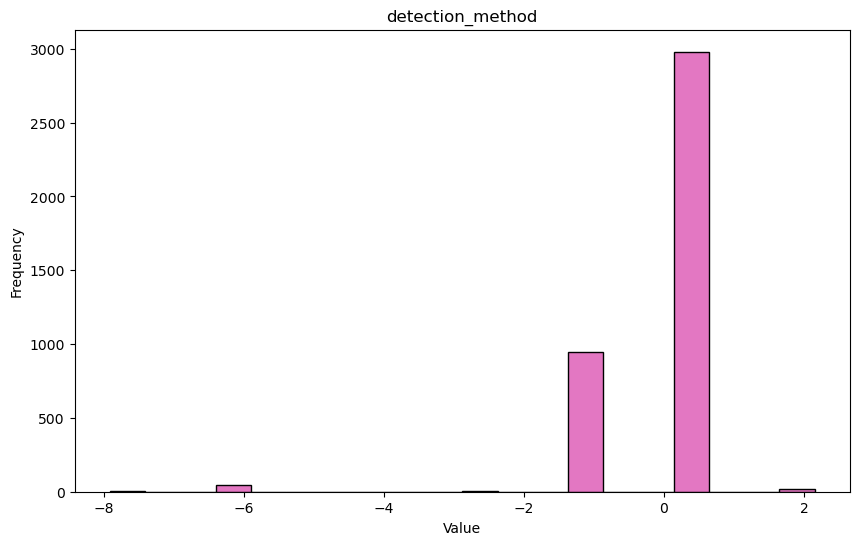

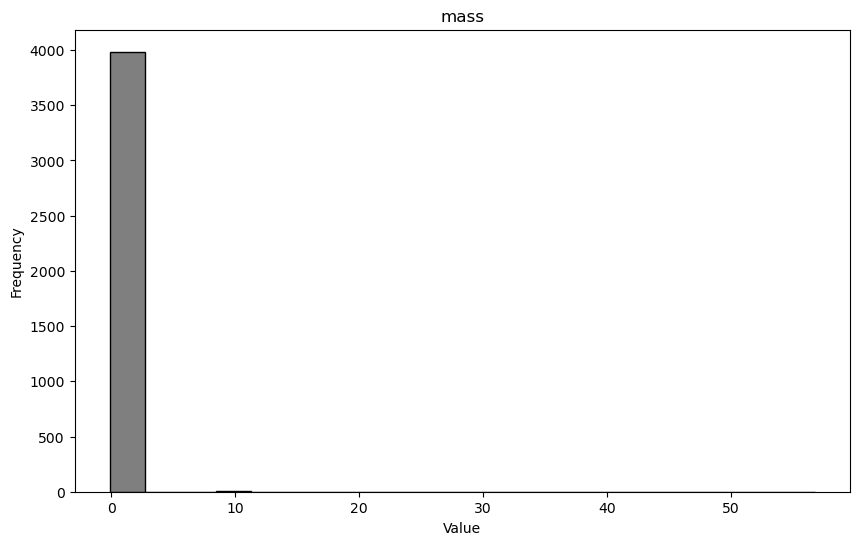

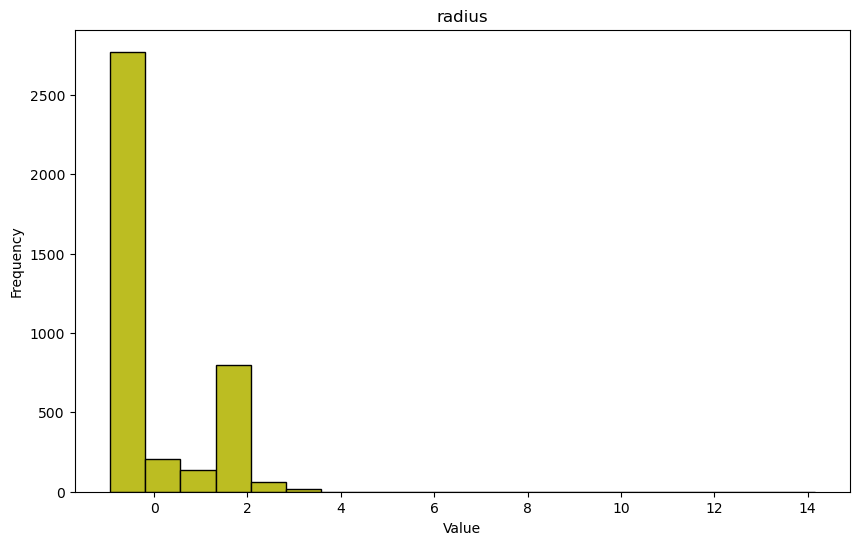

In [136]:
for i in range(9):
    plt.figure(figsize=(10,6))
    plt.hist(X_classification.iloc[:, i], color=f"C{i}", bins=20, edgecolor='black')
    plt.title(X_classification.columns[i])
    plt.xlabel("Value")
    plt.ylabel("Frequency")


## Plotting attributes

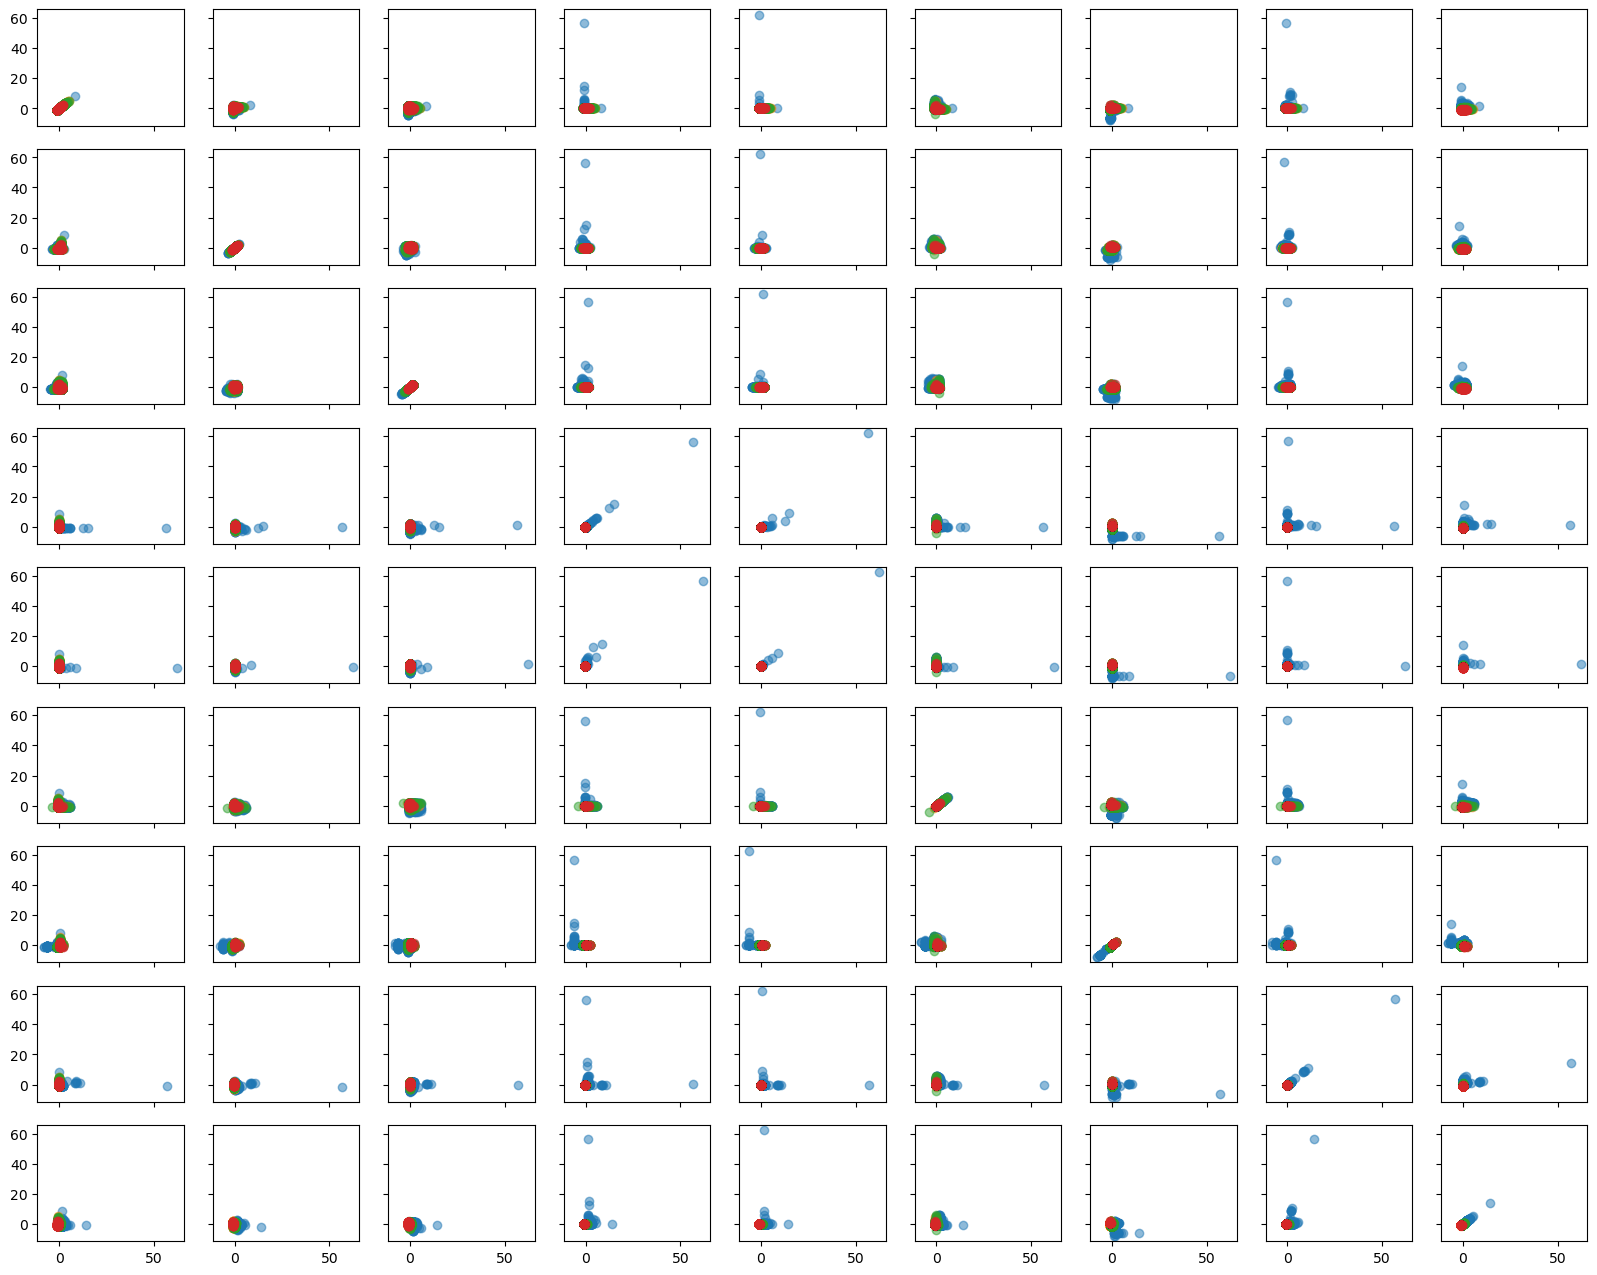

In [141]:
fig, axs = plt.subplots(9, 9, figsize=(20, 16), sharex='col', sharey='row')
for i in range(9):
    for j in range(9):
        for type in y_classification.unique():
            mask = (y_classification == type)
            axs[j, i].scatter(
                x=X_classification[mask][X_classification.columns[j]],
                y=X_classification[mask][X_classification.columns[i]],
                label=type,
                alpha=0.5
            )

plt.show()